# COVID-19 Global Analysis & Policy Impact Study(Version 1)

## Exploratory, Correlational & Policy based analysis

_By Anuran Dutta Chowdhury • Last updated: May 2025_


### ***Descriptive Analysis***

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import seaborn as sns

### Insight 1: *Global Death Trend*

**Metric:** 7-day rolling average per million  
**Purpose:** Establish global trendline, highlight key pandemic events


In [3]:
#loading the necessary datasets
df_cases_deaths = pd.read_csv('cases_deaths.csv')

#cleaning the data as per the requirements

df_cases_deaths['date'] = pd.to_datetime(df_cases_deaths['date'])
df_cases_deaths = df_cases_deaths.dropna(subset=[
    'new_cases_per_million_7_day_avg_right',
    'new_deaths_per_million_7_day_avg_right'
])
#df_cases_deaths.info()

Here we calculate the **daily global average** of new cases and deaths per million, based on the **smoothed 7-day rolling average**. This shows the average experience across all reporting countries each day.


In [4]:
#global avg per day 
global_avg = df_cases_deaths.groupby('date')[['new_cases_per_million_7_day_avg_right', 'new_deaths_per_million_7_day_avg_right']].mean().reset_index()
global_avg.head()

,date,new_cases_per_million_7_day_avg_right,new_deaths_per_million_7_day_avg_right
0,2020-01-09,0.017205,3.386632e-05
1,2020-01-10,0.014808,2.891216e-05
2,2020-01-11,0.014675,2.891216e-05
3,2020-01-12,0.014708,7.953666e-07
4,2020-01-13,0.014714,7.953666e-07


The following line-chart plots daily global averages of new infections. <br>
Major intervention milestones and viral wave events have been annotated to highlight the observed surges and declines.

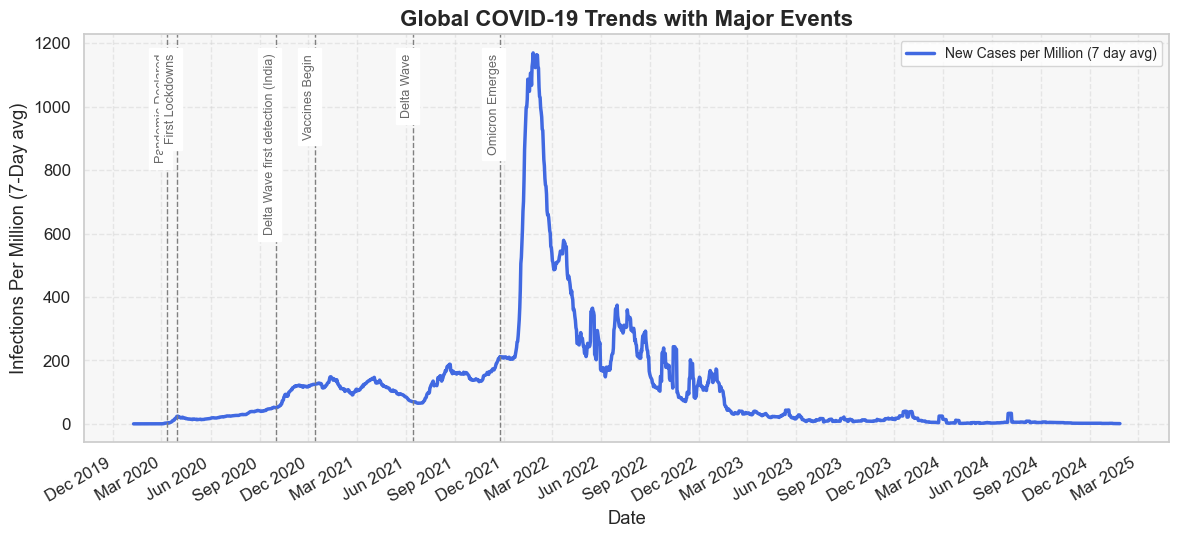

In [5]:
# Defining major COVID-19 global events for the plot
events = {
    "Pandemic Declared": "2020-03-11",
    "First Lockdowns": "2020-03-30",
    "Vaccines Begin": "2020-12-14",
    "Delta Wave first detection (India)" : "2020-10-01",
    "Delta Wave": "2021-06-15",
    "Omicron Emerges": "2021-11-24"
}

sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize = (14,6))

ax.plot(global_avg['date'], global_avg['new_cases_per_million_7_day_avg_right'], label = "New Cases per Million (7 day avg)", color="royalblue", linewidth = 2.5)
#ax.plot(global_avg['date'], global_avg['new_deaths_per_million_7_day_avg_right'], label = "New Deaths per Million (7 day avg)", color="crimson", linewidth = 2.5)

#annotating the events
for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    ax.axvline(date, color='gray', linestyle= '--', linewidth= 1)
    ax.text(date, ax.get_ylim()[1]*0.95, label, rotation = 90, verticalalignment='top', horizontalalignment= 'right', fontsize=9, backgroundcolor='white', color='dimgray')

ax.set_title("Global COVID-19 Trends with Major Events", fontsize = 16, weight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Infections Per Million (7-Day avg)")

# Date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

# Customizing the grid, legend, background
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc="upper right", frameon=True, fontsize=10)
ax.set_facecolor("#f7f7f7")
fig.patch.set_facecolor('white')



### *Insight 2: Global Death Trend*  
Now, we will plot the mortality trends (per million 7-day rolling avg) to contextualize the infection trends.

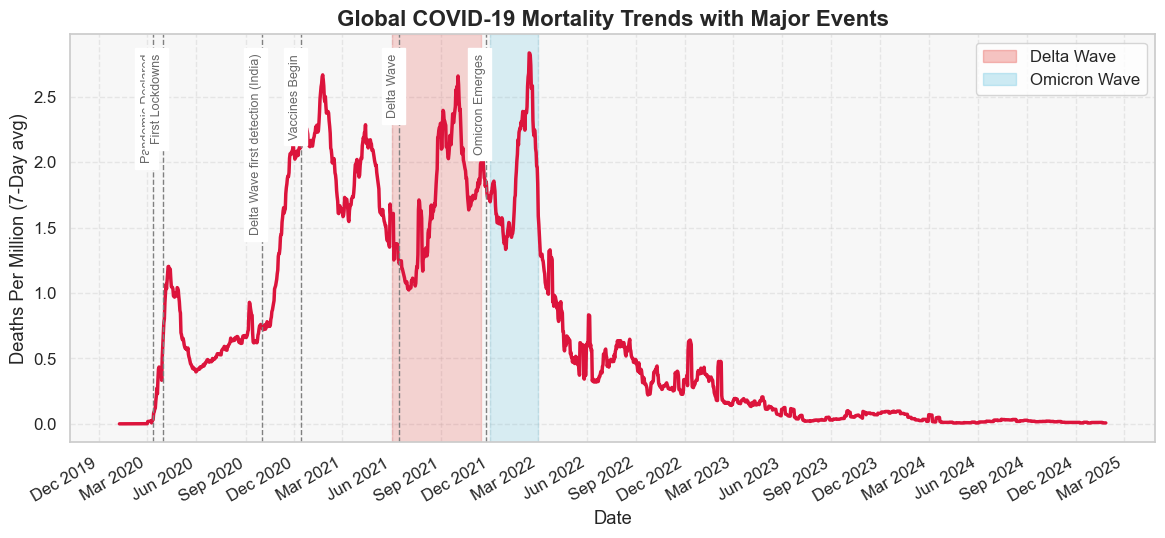

In [6]:
sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize = (14,6))

#ax.plot(global_avg['date'], global_avg['new_cases_per_million_7_day_avg_right'], label = "New Cases per Million (7 day avg)", color="royalblue", linewidth = 2.5)
ax.plot(global_avg['date'], global_avg['new_deaths_per_million_7_day_avg_right'], label = "New Deaths per Million (7 day avg)", color="crimson", linewidth = 2.5)

#annotating the events
for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    ax.axvline(date, color='gray', linestyle= '--', linewidth= 1)
    ax.text(date, ax.get_ylim()[1]*0.95, label, rotation = 90, verticalalignment='top', horizontalalignment= 'right', fontsize=9, backgroundcolor='white', color='dimgray')

ax.set_title("Global COVID-19 Mortality Trends with Major Events", fontsize = 16, weight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Deaths Per Million (7-Day avg)")

# Date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

# Customizing the grid, legend, background
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc="upper right", frameon=True, fontsize=10)
ax.set_facecolor("#f7f7f7")
fig.patch.set_facecolor('white')

#colorcoding the waves
ax.axvspan(pd.to_datetime('2021-06-01'), pd.to_datetime('2021-11-15'),
           color='#e43e38', alpha=0.2, label='Delta Wave')
ax.axvspan(pd.to_datetime('2021-12-01'), pd.to_datetime('2022-03-01'),
           color='#5bc0de', alpha=0.2, label='Omicron Wave')

delta_patch = mpatches.Patch(color='#e43e38', alpha=0.3, label='Delta Wave')
omicron_patch = mpatches.Patch(color='#5bc0de', alpha=0.3, label='Omicron Wave')

ax.legend(handles=[delta_patch, omicron_patch], loc='upper right', frameon=True)


Now, there was a clear and visible difference in infection spikes and death spikes from the two plots above.<br>
For example, the mortality spiked to similar extremes during Delta and Omicron waves yet the Infection spike for Omicron was way higher.<br>
To further investigate the matter, we'd now plot a bar chart to visualize the CFR (Case Fatality Rate) for Delta Waves vs Omicron Wave.

### *Insight 3: Case Fatality Rate (CFR) Comparison: Delta vs Omicron*

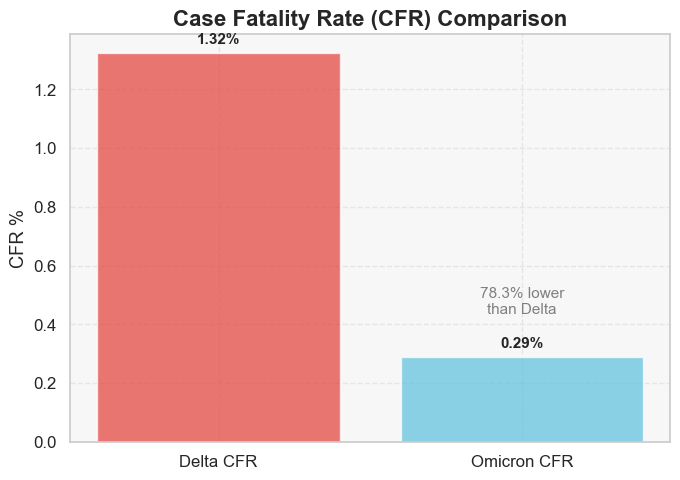

In [7]:
# Delta Wave
delta_start = '2021-05-15'
delta_end   = '2021-11-15'

# Omicron Wave
omicron_start = '2021-12-01'
omicron_end   = '2022-03-01'

#calculating the CFR for Delta and Omicron waves
delta_df = global_avg[(global_avg['date'] >= delta_start) & (global_avg['date'] <= delta_end)]
omicron_df = global_avg[(global_avg['date'] >= omicron_start) & (global_avg['date'] <= omicron_end)]

delta_cases= delta_df['new_cases_per_million_7_day_avg_right'].sum()
delta_deaths= delta_df['new_deaths_per_million_7_day_avg_right'].sum()

omicron_cases = omicron_df['new_cases_per_million_7_day_avg_right'].sum()
omicron_deaths = omicron_df['new_deaths_per_million_7_day_avg_right'].sum()

delta_cfr = (delta_deaths / delta_cases) * 100
omicron_cfr = (omicron_deaths / omicron_cases) * 100

#plotting the bar chart
labels = ['Delta CFR', 'Omicron CFR']
cfr = [delta_cfr, omicron_cfr]

sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize = (7,5))

bars = ax.bar(labels, cfr, color=["#e43e38", '#5bc0de'], alpha=0.7)

ax.grid(True, linestyle='--', alpha=0.4)
ax.set_facecolor("#f7f7f7")
fig.patch.set_facecolor('white')

ax.set_title('Case Fatality Rate (CFR) Comparison',fontsize = 16, weight='bold')
ax.set_ylabel('CFR %',)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

reduction = ((delta_cfr - omicron_cfr) / delta_cfr) * 100
ax.annotate(f'{reduction:.1f}% lower\nthan Delta',
            xy=(1, omicron_cfr + 0.15),
            ha='center', fontsize=11, color='gray')

plt.tight_layout()


_Figure: Comparison of global Case Fatality Rate (CFR) between Delta and Omicron waves_

The chart above shows the stark difference in Case Fatality Rates (CFR) between the Delta and Omicron waves. During the Delta wave (May–Nov 2021), the global CFR reached approximately **1.32%**, while during the Omicron wave (Dec 2021–Mar 2022), it dropped to **0.29%**—a **78.3% decrease**.

This substantial reduction in CFR shows that Omicron was much less lethan than that of Delta Variant despite having high transmission rate. Several factors likely contributed to this decline, including increased vaccination coverage, prior infection-driven immunity, improved clinical management, and potentially inherent pathological difference between the Delta and Omicron variant.

Next we will look at the **Global R-Rate trend**.

### *Insight 4: Global R-Rate Trend*

Text(0, 0.5, 'Reproduction Rate (R)')

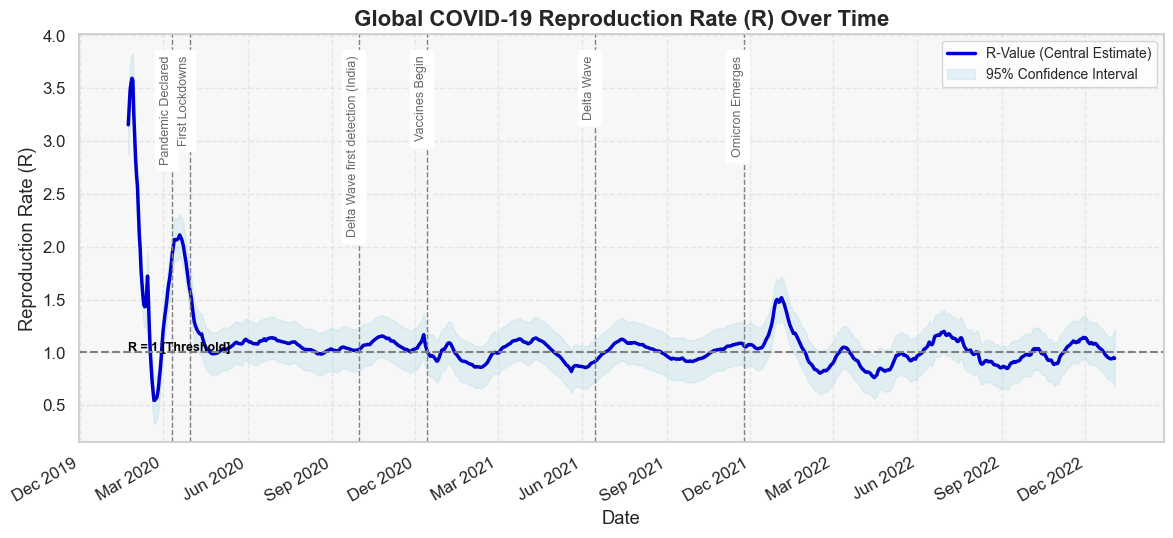

In [8]:
#importing necessary dataset
df_r = pd.read_csv('tracking_r.csv')

#filtering the dataset by "World"
world_r = df_r[df_r['country']=='World'].copy()
world_r['date'] = pd.to_datetime(world_r['date'])

#plotting the r-rate with ci_95_u and ci_85_i for confidence shading
sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize = (14,6))

ax.plot(world_r['date'], world_r['r'], label = 'R-Value (Central Estimate)', color="mediumblue", linewidth = 2.5)

ax.fill_between(world_r['date'], world_r['ci_95_l'], world_r['ci_95_u'], color='lightblue', alpha=0.3, label='95% Confidence Interval')

ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc="upper right", frameon=True, fontsize=10)
ax.set_facecolor("#f7f7f7")
fig.patch.set_facecolor('white')

# Date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

#annotating the events
for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    ax.axvline(date, color='gray', linestyle= '--', linewidth= 1)
    ax.text(date, ax.get_ylim()[1]*0.95, label, rotation = 90, verticalalignment='top', horizontalalignment= 'right', fontsize=9, backgroundcolor='white', color='dimgray')

# Horizontal reference line at R = 1
plt.axhline(1, color='gray', linestyle='--', linewidth=1.5)
plt.text(world_r['date'].min(), 1.01, "R = 1 [Threshold]", color='black', fontsize=9, weight = 'bold')

# Titles and labels
ax.set_title("Global COVID-19 Reproduction Rate (R) Over Time", fontsize=16, weight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Reproduction Rate (R)")


_Figure: Global COVID-19 Reproduction (R) rate trend over time_

**Key Insight:**  
As we can see from the figure above, the global R-value consistently dropped below 1 following early interventions in 2020.  
Delta and Omicron spikes pushed the R above 1 again, but the average reproduction rate remained relatively contained in 2022, indicating increased immunity and policy impact.


Now, we will look at the country specific trendline of infections

### *Insight 5: Country Specific Multi-line Infection Trend*

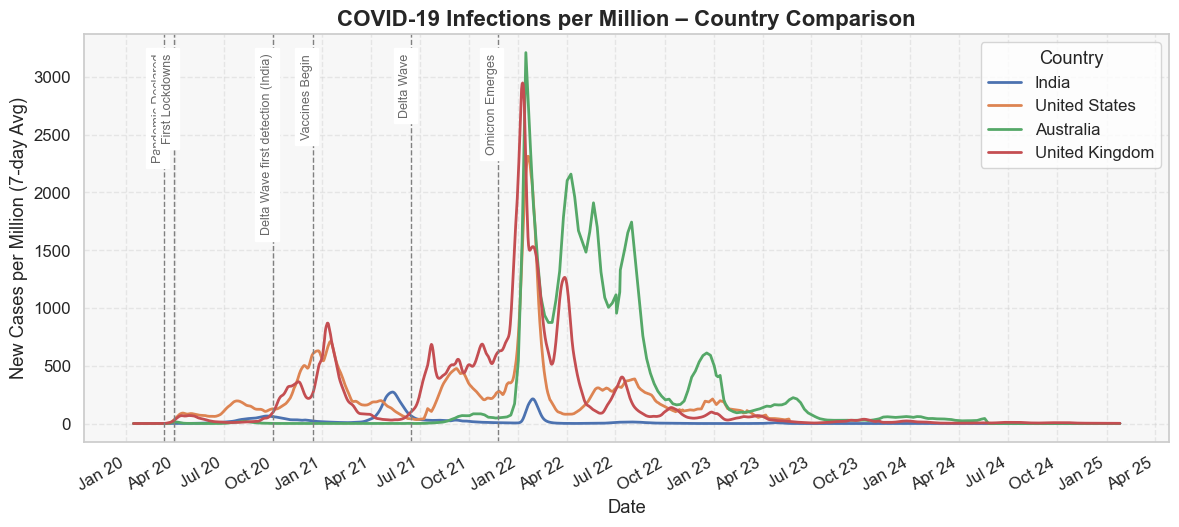

In [9]:
#choosing the contrasting countries
countries = ['India', 'United States', 'Australia', 'United Kingdom']
df_country = df_cases_deaths[df_cases_deaths['country'].isin(countries)].copy()

#smoothing the cases even further
df_country['smoothed_cases'] = df_country.groupby('country')['new_cases_per_million_7_day_avg_right'].transform(lambda x: x.rolling(window=7).mean())

#plotting the country specific multi-line infection trendline

sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize = (14,6))

# Plot each country
for country in countries:
    subset = df_country[df_country['country'] == country]
    ax.plot(subset['date'], subset['smoothed_cases'], label=country, linewidth=2)

#annotating the events 
for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    ax.axvline(date, color='gray', linestyle= '--', linewidth= 1)
    ax.text(date, ax.get_ylim()[1]*0.95, label, rotation = 90, verticalalignment='top', horizontalalignment= 'right', fontsize=9, backgroundcolor='white', color='dimgray')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
fig.autofmt_xdate()

ax.grid(True, linestyle = '--', alpha= 0.4)
ax.set_facecolor(color="#f7f7f7")
                           

ax.set_title("COVID-19 Infections per Million – Country Comparison", fontsize=16, weight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("New Cases per Million (7-day Avg)")
ax.legend(title='Country', loc='upper right')


_Figure: Country Specific multi-line Case Comparison_

As seen in the chart above, the pandemic affected each country differently — not just in terms of **timing**, but also in **intensity** and **wave patterns**.

In the coming sections, we’ll explore the underlying factors that may have contributed to these differences, such as **policy interventions**, **vaccination coverage**, and **socioeconomic context**.

> **Note:** India’s seemingly flat infection curve is a result of **population normalization** — this chart shows infections **per million people**, which makes countries with larger populations appear less severe in relative terms. Even though India's infection and Death count was devastating in terms of raw counts.


### ***Correlational Analysis***

### Insight 1: Lagged Correlation — Policy Impact Over Time
_Analyzing if tighter policies led to reduced infection rates after a delay._


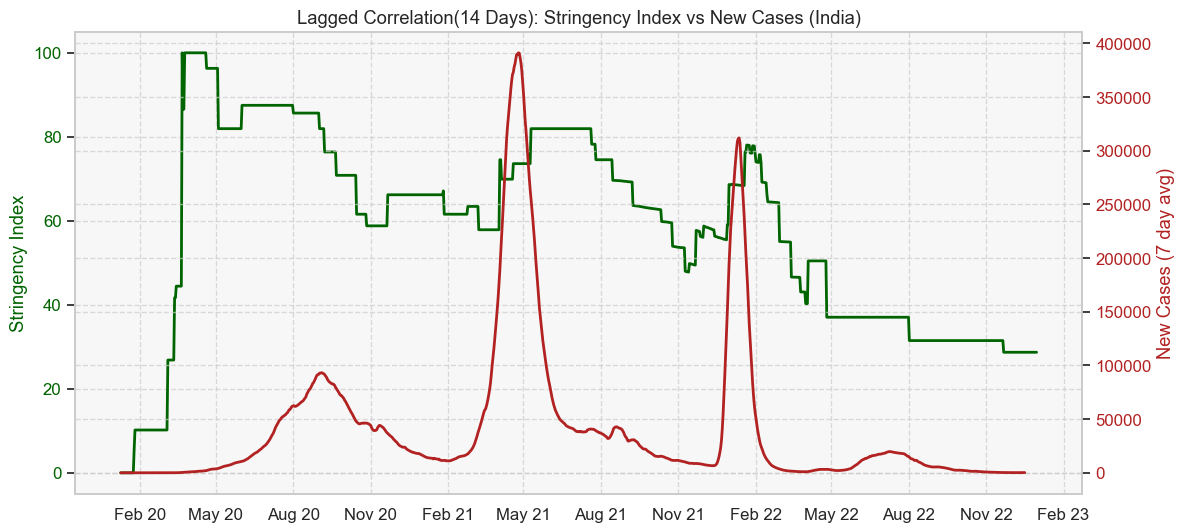

In [10]:
#imporitng the necessary datasets
df_str = pd.read_csv('oxcgrt_policy.csv')
df_str['date'] = pd.to_datetime(df_str['date'])
df_cases_deaths['date'] = pd.to_datetime(df_cases_deaths['date'])
df_str.isnull().sum()

#merging two datasets in the basis on date and country
merged_str = pd.merge(
    df_cases_deaths[['country', 'date', 'new_cases_7_day_avg_right', 'new_cases_per_million_7_day_avg_right', 'new_deaths_per_million_7_day_avg_right']],
    df_str[['country', 'date', 'stringency_index']],
    on=['country', 'date'],
    how='inner'
)
#creating a list of entries in the country column that are not countries
non_countries = {
    'Africa', 'Asia', 'Europe', 'European Union (27)', 'North America',
    'Oceania', 'South America', 'World',
    'High-income countries', 'Low-income countries',
    'Upper-middle-income countries', 'Lower-middle-income countries'
}

merged_str = merged_str[~merged_str['country'].isin(non_countries)]

merged_str_india = merged_str[merged_str['country']=='India'].copy()

# Create a lagged version of new cases (e.g., shifted by 14 days)
merged_str['new_cases_lagged'] = merged_str['new_cases_7_day_avg_right'].shift(-14)
merged_str_india['new_cases_lagged'] = merged_str_india['new_cases_7_day_avg_right'].shift(-14)

fig, ax1 = plt.subplots(figsize=(13, 6))

# Left Y-axis: Stringency
ax1.plot(merged_str_india['date'], merged_str_india['stringency_index'], color='darkgreen', label='Stringency Index', linewidth=2)
ax1.set_ylabel('Stringency Index', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Right Y-axis: Lagged Cases
ax2 = ax1.twinx()
ax2.plot(merged_str_india['date'], merged_str_india['new_cases_lagged'], color='firebrick', label='New Cases (Lagged)', linewidth=2)
ax2.set_ylabel('New Cases (7 day avg)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Lagged Correlation(14 Days): Stringency Index vs New Cases (India)')
plt.xlabel('Date')

ax1.grid(True, linestyle= '--', alpha=0.7)
ax2.grid(True, linestyle= '--', alpha=0.7)
ax1.set_facecolor('#f7f7f7')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

_Figure: Stringency Index vs New Cases(Lagged line chart)_

This chart shows how government policy strictness (Stringency Index) correlates with infection trends after a 14-day delay. Here we are using **India** as a representative case study.

India was chosen for this analysis because of its large population, significant and well-documented infection waves (particularly during the Delta and Omicron surges). These characteristics make it an ideal candidate for observing the **cause-effect relationship** between public health interventions and the infection trends.

We observe a consistent pattern: sharp increases in stringency results in noticeable drops in new cases within approximately two weeks. This supports the hypothesis that **Govt interventions such as lockdowns, mask mandates, and gathering restrictions had a measurable and timely impact on controlling infection spread**.

On the contrary, periods of **relaxed policy measures** often correlates with **spikes in infections**.

This lagged correlation plot demonstrates that **timing matters** — and that policy can be an effective weapon against the infection, especially when enforced proactively and during periods of high transmission.


### Insight 2: Overall Correlation — Stringency vs New Cases
_Exploring how strictness levels relate to infection rates across all countries and dates._

Text(0.5, 1.0, 'Overall Correlation - Stringency Index vs New Cases')

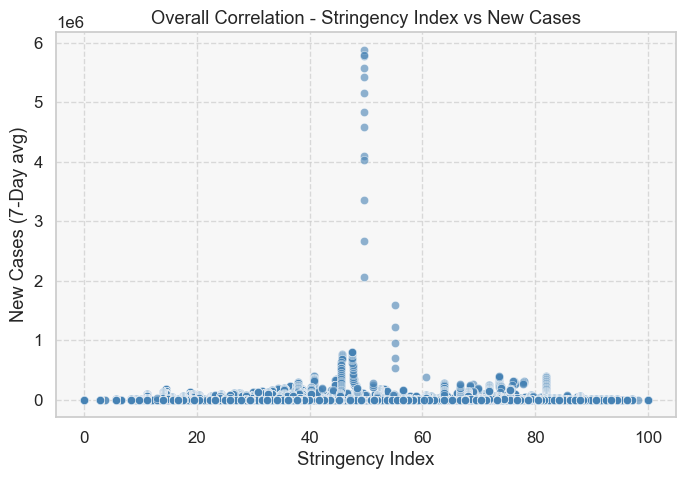

In [11]:
sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(
    data=merged_str,
    x='stringency_index',
    y='new_cases_7_day_avg_right',
    alpha=0.6,
    color='steelblue'
)

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_facecolor('#f7f7f7')
ax.set_xlabel('Stringency Index')
ax.set_ylabel('New Cases (7-Day avg)')
ax.set_title('Overall Correlation - Stringency Index vs New Cases')

_Figure: Stringency Index vs New Cases Overall Correlation(Scatter plot)_

This scatter plot explores the overall relationship between **policy strictness** (Stringency Index) and **infection rates** (7-day average of new cases) across all country and date.

Unlike the lagged line plot, which focuses on a single country over time, this visualization captures a **global picture**, helping us identify whether higher stringency levels are correlated with lower infection rates.

While there is no strong linear correlation, we can still spot several key patterns:
- A **dense cluster of high infection counts** is observed around **moderate stringency levels (40–60)**, suggesting that partial loosening of govt restrictions such as lockdowns during critical times may have increased transmission.
- **Lower case densities appear at higher stringency levels (above 70)**, indicating that more aggressive policy responses were potentially more effective.
- The absence of a strong downward trend also hints at the complexity of pandemic control, where factors like **policy timing, population behavior**, and **testing/reporting practices** influence the outcomes.



### Insight 3: Vaccination Rate vs Total Deaths – Income Group Disparities


In [12]:
#importing necessary dataset
df_vax = pd.read_csv('vaccinations_global.csv')
df_vax['date'] = pd.to_datetime(df_vax['date']).copy()
df_economy = pd.read_csv('country_income_classification.csv')

#Merging vaccination and deaths data on country and date
vax_temp = pd.merge(
    df_vax[['country', 'date', 'people_fully_vaccinated_per_hundred']],
    df_cases_deaths[['country', 'date', 'total_deaths_per_million', 'new_deaths_7_day_avg_right']],
    on=['country', 'date'],
    how='inner'
)

#Merging the income classification
vax = pd.merge(
    vax_temp,
    df_economy[['country', 'income_group']],
    on='country',
    how='left'  
)

#removing non-country entries
vax = vax[~vax['country'].isin(non_countries)]
#checking non unique values to make sure the non-country entries are gone
vax['country'].unique()

# exclude pre-vaccine era
vax = vax[vax['date'] >= '2021-01-01']  

#handling missing values of people_fully_vaccinated_per_hundred
vax['people_fully_vaccinated_per_hundred'] = vax['people_fully_vaccinated_per_hundred'].ffill()

vax.isnull().sum()

#fixing the missing values in the income_group column
manual_income_fixes = {
    'Anguilla': 'High income',
    'Aruba': 'High income',
    'Bermuda': 'High income',
    'Bonaire Sint Eustatius and Saba': 'High income',
    'British Virgin Islands': 'High income',
    'Cayman Islands': 'High income',
    'Cook Islands': 'Upper middle income', 
    'Costa Rica': 'Upper middle income',
    'Curacao': 'High income',
    'East Timor': 'Lower middle income'
}

vax['income_group'] = vax['income_group'].fillna(vax['country'].map(manual_income_fixes))


In [13]:
vax.isnull().sum()

country                                 0
date                                    0
people_fully_vaccinated_per_hundred    78
total_deaths_per_million                0
new_deaths_7_day_avg_right              0
income_group                            0
dtype: int64

In [14]:
# Sorting by date to get the latest reported data
vax_sorted = vax.sort_values('date')

# Then grouping by the last available record for each country
vax_latest = vax_sorted.groupby('country').last().reset_index()

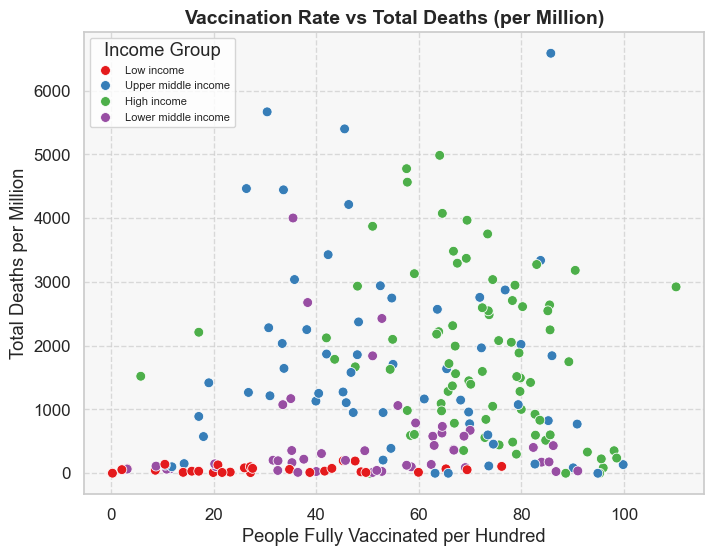

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(style='whitegrid', font_scale=1.1)

sns.scatterplot(
    data=vax_latest,
    x='people_fully_vaccinated_per_hundred',
    y='total_deaths_per_million',
    hue='income_group',
    palette='Set1',
    s=50
)

ax.set_title('Vaccination Rate vs Total Deaths (per Million)', fontsize=14, weight ='bold')
ax.set_xlabel('People Fully Vaccinated per Hundred')
ax.set_ylabel('Total Deaths per Million')
plt.legend(title='Income Group', loc='upper left', fontsize =8)
plt.grid(True, linestyle='--', alpha=0.7)
ax.set_facecolor("#f7f7f7")




This scatter plot explores the relationship between vaccination coverage (measured as people fully vaccinated per hundred) and cumulative deaths per million across countries, categorized by income group.

**Key insights:**
- **High-income countries** achieved higher vaccination coverage, but some still faced substantial mortality — possibly due to early waves and older populations.
- **Upper-middle-income countries** show wide variation in both vaccination and death rates, reflecting diverse policy responses and healthcare capacities.
- **Low-income countries** appear clustered with both low vaccination and reported deaths. However, this may reflect underreporting or data limitations rather than actual outcomes.
- Overall, there is a general downward trend: higher vaccination tends to correlate with lower death rates.

This visualization helps highlight global health inequities and supports the argument that vaccine access played a key role in pandemic outcomes.


### Insight 4: Vaccination vs Mortality – Lagged Impact (India)  
_Analyzing how rising vaccination rates correlated with COVID-19 death trends in India._

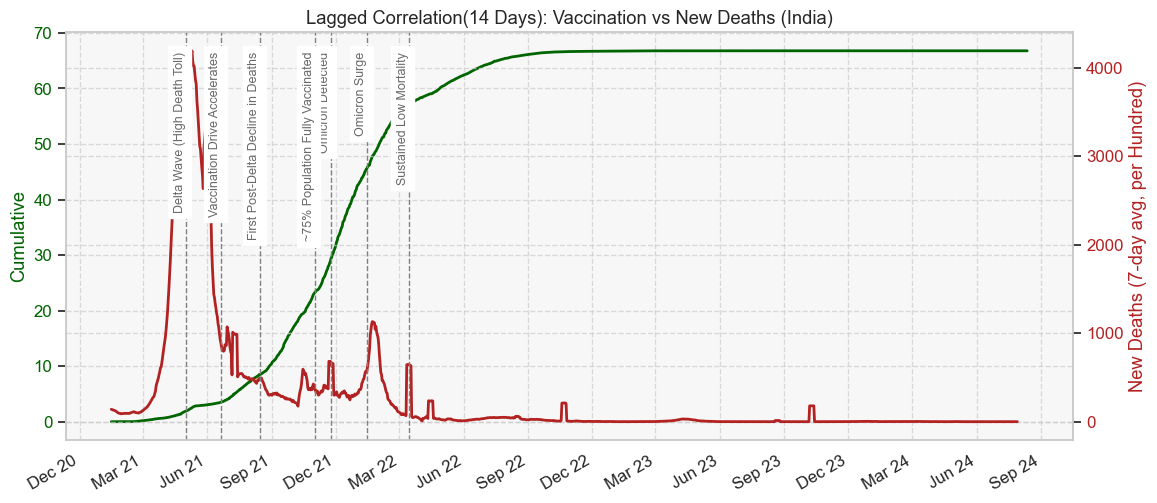

In [16]:
vax_india = vax[vax['country']=='India'].copy()

# Create a lagged version of new deaths (e.g., shifted by 14 days)
vax_india['new_deaths_lagged'] = vax_india['new_deaths_7_day_avg_right'].shift(-14)

fig, ax1 = plt.subplots(figsize=(13, 6))

# Left Y-axis: Vaccination per hundred
ax1.plot(vax_india['date'], vax_india['people_fully_vaccinated_per_hundred'], color='darkgreen', label='people_fully_vaccinated_per_hundred', linewidth=2)
ax1.set_ylabel("Cumulative", color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Right Y-axis: Lagged deaths
ax2 = ax1.twinx()
ax2.plot(vax_india['date'], vax_india['new_deaths_lagged'], color='firebrick', label='New deaths (Lagged)', linewidth=2)
ax2.set_ylabel("New Deaths (7-day avg, per Hundred)", color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Lagged Correlation(14 Days): Vaccination vs New Deaths (India)')
plt.xlabel('Date')

ax1.grid(True, linestyle= '--', alpha=0.7)
ax2.grid(True, linestyle= '--', alpha=0.7)
ax1.set_facecolor('#f7f7f7')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
fig.autofmt_xdate()

events2 = {
    "Delta Wave (High Death Toll)": "2021-05-01",
    "Vaccination Drive Accelerates": "2021-06-21",
    "First Post-Delta Decline in Deaths": "2021-08-15",
    "Omicron Detected": "2021-11-24",
    "Omicron Surge": "2022-01-15",
    "Sustained Low Mortality": "2022-03-15",
    "~75% Population Fully Vaccinated": "2021-11-01"
}

#annotating the events
for label, date_str in events2.items():
    date = pd.to_datetime(date_str)
    ax2.axvline(date, color='gray', linestyle= '--', linewidth= 1)
    ax2.text(date, ax2.get_ylim()[1]*0.95, label, rotation = 90, verticalalignment='top', horizontalalignment= 'right', fontsize=9, backgroundcolor='white', color='dimgray')



This chart visualizes the relationship between the rise in vaccination coverage (left axis) and subsequent changes in COVID-19 deaths (right axis), lagged by 14 days to reflect delayed health outcomes.

**Key observations:**
- **During the Delta wave (May–Jul 2021)**, deaths peaked sharply before vaccine coverage had substantially risen.
- **As vaccination efforts accelerated mid-2021**, a **visible and sustained decline in death rates** followed, suggesting a strong protective effect.
- **Despite the massive Omicron infection wave**, the death toll remained relatively low — highlighting the **decoupling effect of widespread vaccination**.
- From early 2022 onward, India maintained **low mortality rates**, even amidst minor case surges.

This insight reinforces the efficacy of vaccination in mitigating severe outcomes and sets the stage for broader correlation and policy-based impact analysis in the following sections.

Now, we will move on to **Policy Impact Analysis** to take a deep dive into how the govt policies combat the spread of covid infection and how succesful they were

##  ***Policy Impact Analysis***  
**Measuring the Real-World Effect of Government Interventions**


###  Case Study Analysis: Contrasting Policy Outcomes  
**Sweden vs Australia – How Strict vs Relaxed Policies Shaped the Pandemic**


Text(0.5, 0.98, 'COVID-19 Case Trends vs Policy Stringency: Australia vs Sweden')

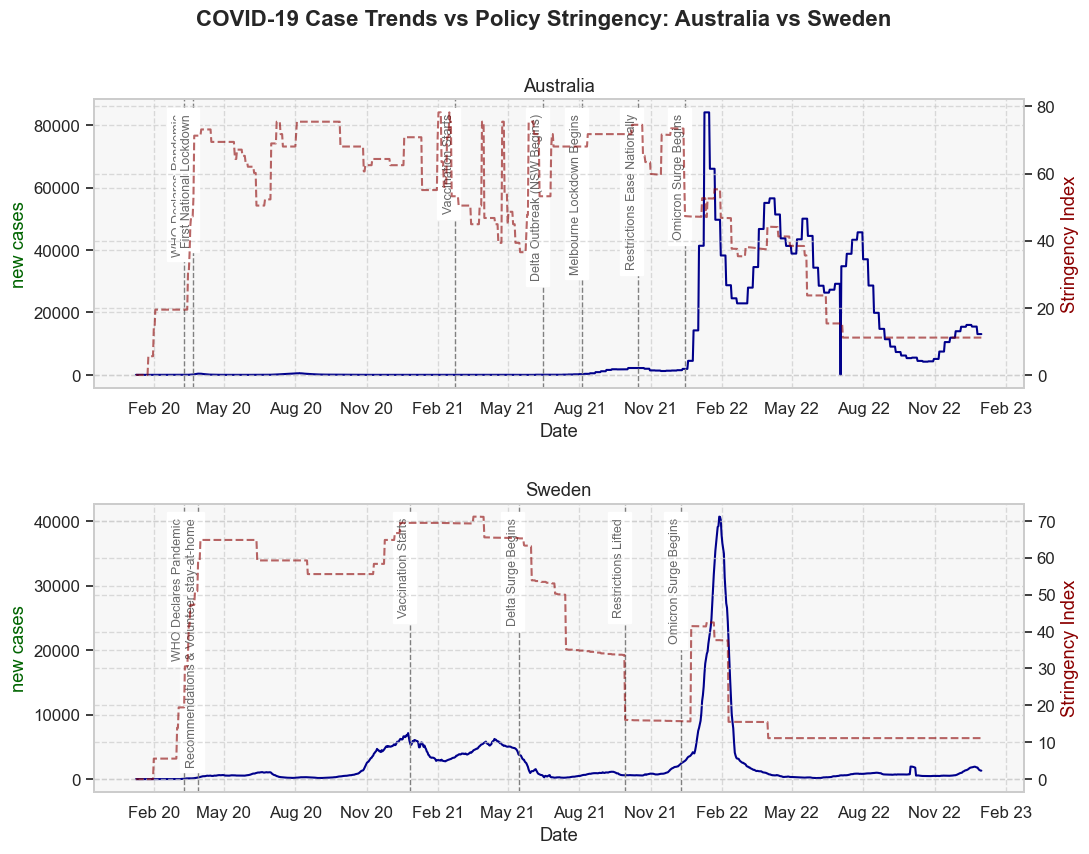

In [17]:
merged_str_aus = merged_str[merged_str['country']=='Australia'].copy()
merged_str_swe = merged_str[merged_str['country']=='Sweden'].copy()

# Creating a figure with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))
sns.set(style='whitegrid', font_scale=1.1)

# Creating twin axes for stringency
ax1b = ax1.twinx()
ax2b = ax2.twinx()

# First plot
ax1.plot(merged_str_aus['date'], merged_str_aus['new_cases_7_day_avg_right'], color='darkblue')
ax1b.plot(merged_str_aus['date'], merged_str_aus['stringency_index'], color='darkred', linestyle='--', alpha=0.6, label='Stringency Index')
ax1.set_title('Australia')
ax1.set_ylabel('new cases', color='darkgreen')
ax1b.set_ylabel('Stringency Index', color='darkred')
ax1.set_xlabel('Date')

# Second plot
ax2.plot(merged_str_swe['date'], merged_str_swe['new_cases_7_day_avg_right'], color='darkblue')
ax2b.plot(merged_str_aus['date'], merged_str_swe['stringency_index'], color='darkred', linestyle='--', alpha=0.6, label='Stringency Index')
ax2.set_title('Sweden')
ax2.set_ylabel('new cases', color='darkgreen')
ax2b.set_ylabel('Stringency Index', color='darkred')
ax2.set_xlabel('Date')

sweden_events = {
    "WHO Declares Pandemic": "2020-03-11",
    "Recommendations & Volunteer stay-at-home": "2020-03-29",
    "Vaccination Starts": "2020-12-27",
    "Delta Surge Begins": "2021-05-15",
    "Restrictions Lifted": "2021-09-29",
    "Omicron Surge Begins": "2021-12-10"
}

australia_events = {
    "WHO Declares Pandemic": "2020-03-11",
    "First National Lockdown": "2020-03-23",
    "Vaccination Starts": "2021-02-22",
    "Delta Outbreak (NSW Begins)": "2021-06-16",
    "Melbourne Lockdown Begins": "2021-08-05",
    "Restrictions Ease Nationally": "2021-10-15",
    "Omicron Surge Begins": "2021-12-15"
}


#annotating the events
for label, date_str in australia_events.items():
    date = pd.to_datetime(date_str)
    ax1.axvline(date, color='gray', linestyle='--', linewidth=1)
    ax1.text(date, ax1.get_ylim()[1]*0.95, label,
                rotation=90,
                verticalalignment='top',
                horizontalalignment='right',
                fontsize=9,
                backgroundcolor='white',
                color='dimgray')
        
for label, date_str in sweden_events.items():
    date = pd.to_datetime(date_str)
    ax2.axvline(date, color='gray', linestyle='--', linewidth=1)
    ax2.text(date, ax2.get_ylim()[1]*0.95, label,
                rotation=90,
                verticalalignment='top',
                horizontalalignment='right',
                fontsize=9,
                backgroundcolor='white',
                color='dimgray')


for ax in [ax1, ax2, ax1b, ax2b]:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_facecolor('#f7f7f7')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.subplots_adjust(hspace=0.4)

fig.suptitle("COVID-19 Case Trends vs Policy Stringency: Australia vs Sweden", fontsize=16, fontweight='bold')



The plot compares **new COVID-19 cases** with the **government stringency index** over time for **Australia** and **Sweden**, two countries that followed contrasting strategies.

- **Australia** implemented **strict and prolonged lockdowns**, reflected by consistently high stringency levels. This approach seems to have suppressed large waves until late 2021, with noticeable spikes coinciding with the easing of restrictions.
  
- **Sweden**, on the other hand, adopted a **more relaxed approach**, maintaining relatively low stringency throughout the pandemic with recommendations and volunteering services instead of strict nation-wide lockdown. This resulted in **earlier and more sustained waves** of infections, especially during 2020–2021.

### Insight

The visually contrasting chart suggests that **stringent policies may delay or dampen infection surges**, though not necessarily prevent them entirely. The highly transmissible variants (like Omicron) eventually caused significant waves in both countries, but the timing and intensity differed.

###  ***Key COVID-19 Metrics: Australia vs. Sweden***

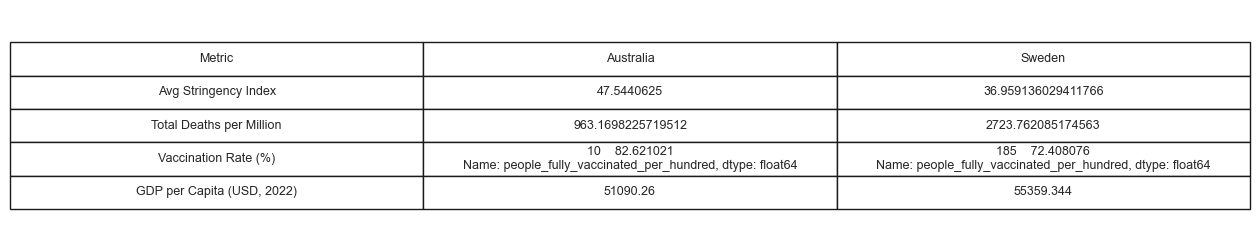

In [18]:
df_compact = pd.read_csv('compact.csv')

australia_avg_stringency = merged_str[merged_str['country'] == 'Australia']['stringency_index'].mean()
sweden_avg_stringency = merged_str[merged_str['country'] == 'Sweden']['stringency_index'].mean()

aus_deaths = df_cases_deaths[(df_cases_deaths['country'] == 'Australia')]['total_deaths_per_million'].max()
swe_deaths = df_cases_deaths[(df_cases_deaths['country'] == 'Sweden')]['total_deaths_per_million'].max()

aus_vaccination_rate = vax_latest[(vax_latest['country'] == 'Australia')]['people_fully_vaccinated_per_hundred']
swe_vaccination_rate = vax_latest[(vax_latest['country'] == 'Sweden')]['people_fully_vaccinated_per_hundred']

aus_gdp = df_compact[(df_compact['country']=='Australia')]['gdp_per_capita'].iloc[-1]
swe_gdp = df_compact[(df_compact['country']=='Sweden')]['gdp_per_capita'].iloc[-1]

data = [
    ["Avg Stringency Index", australia_avg_stringency, sweden_avg_stringency],
    ["Total Deaths per Million", aus_deaths, swe_deaths],
    ["Vaccination Rate (%)", aus_vaccination_rate, swe_vaccination_rate],
    ["GDP per Capita (USD, 2022)", aus_gdp, swe_gdp],
]

columns = ["Metric", "Australia", "Sweden"]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table = ax.table(cellText=data, colLabels=columns, cellLoc='center', loc='center')
table.auto_set_font_size(True)
table.set_fontsize(15)
table.scale(2, 2)

| Metric                        | Australia | Sweden  |
|------------------------------|-----------|---------|
| Avg Stringency Index         | 47.5      | 37.0    |
| Total Deaths per Million     | 963.2     | 2723.8  |
| Vaccination Rate (%)         | 82.6%     | 72.4%   |
| GDP per Capita (USD, 2025)   | 51,090    | 55,359  |


This table summarizes four key indicators that help contextualize the pandemic response and outcomes for Australia and Sweden. Notably:

- **Australia** maintained a higher average stringency index (47.5), reflecting stricter government interventions compared to Sweden (37.0).
- **Total deaths per million** were significantly lower in Australia (963.2) than in Sweden (2723.8), hinting at potentially more effective mitigation measures.
- **Vaccination rates** were also higher in Australia (82.6%) compared to Sweden (72.4%), possibly contributing to better outcomes during later waves.
- In terms of **economic capacity**, Sweden had a higher GDP per capita in 2025 ($55,359 vs. $51,090), which could influence public health spending and resilience.

These indicators provide a high-level snapshot of both countries' pandemic trajectories and policy outcomes, setting the stage for deeper correlation and policy impact analysis.


##  Ranking Government Interventions  
**Top 5 Strictest vs Least Strict Pandemic Responders along with Health Outcomes**


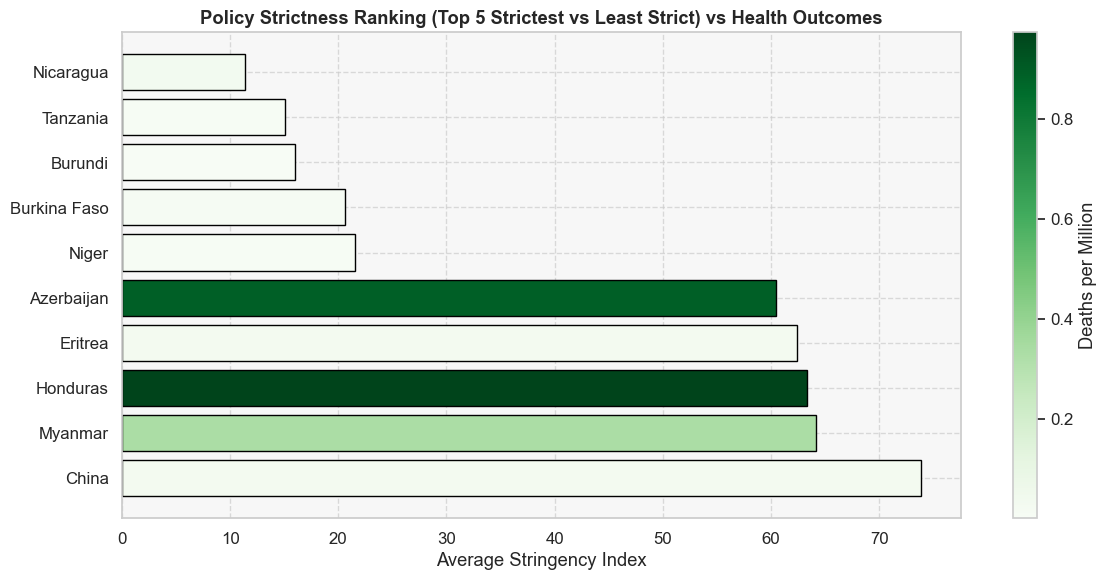

In [19]:
top5_str = merged_str.groupby('country')[['stringency_index', 'new_deaths_per_million_7_day_avg_right']].mean().sort_values(by='stringency_index', ascending = False).head(5)
bottom5_str = merged_str.groupby('country')[['stringency_index', 'new_deaths_per_million_7_day_avg_right']].mean().sort_values(by='stringency_index', ascending = False).tail(5)

combined_str = pd.concat([top5_str, bottom5_str]).reset_index()

# Normalizing colors by deaths per million
norm = plt.Normalize(combined_str['new_deaths_per_million_7_day_avg_right'].min(), combined_str['new_deaths_per_million_7_day_avg_right'].max())
colors = plt.cm.Greens(norm(combined_str['new_deaths_per_million_7_day_avg_right']))

# Creating the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = plt.barh(combined_str['country'], combined_str['stringency_index'], color=colors, edgecolor='black')

# Adding colorbar
sm = plt.cm.ScalarMappable(cmap='Greens', norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Deaths per Million')

plt.title("Policy Strictness Ranking (Top 5 Strictest vs Least Strict) vs Health Outcomes", weight= 'bold')
plt.xlabel("Average Stringency Index")
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
ax.set_facecolor('#f7f7f7')


This chart ranks the **Top 5 most and least strict countries** by their average **Stringency Index**, coloring each bar by the corresponding **average deaths per million (7-day avg)**.

***Key Observations***:

Some of the strictest countries (like China and Myanmar) maintained relatively low death rates, indicating effective suppression.

Meanwhile, countries like Honduras and Azerbaijan also had high stringency but experienced higher death tolls, suggesting that policy timing, public compliance, or healthcare capacity may have played a critical role.

Interestingly, least strict countries like Tanzania and Nicaragua recorded very low official death rates — likely due to underreporting, data limitations, or demographic advantages.

***Takeaway***:
**Strictness alone is not enough**. Its effectiveness depends on a combination of **policy timing, execution, public trust, and data transparency**.

Next we will look at the top 5 insights we can find throughtout this project. 

## Top 5 Insights from the COVID-19 Global Analysis

1. **Omicron Triggered Massive Infections but Fewer Deaths**  
   Despite recording the highest global case spike, the Omicron wave saw a much lower death toll compared to Delta — Which highlights the effect of vaccinations, prior immunity, and possibly lower variant severity.

2. **Vaccination Strongly Correlates with Lower Mortality**  
   A lagged correlation chart (India) showed that as full vaccination coverage increased, death rates fell sharply — reinforcing the life-saving impact of mass vaccination efforts.

3. **Stringent Policies = Fewer Cases (with a Lag)**  
   Policy stringency increments were consistently followed by a decline in new cases after 14 days, demonstrating the real-world effectiveness of timely interventions.

4. **Country Responses Were Drastically Different**  
   Comparing infection trends in India, US, Australia, and the UK showed wide variations in infection trends, emphasizing that policy response timing and intensity significantly shaped outcomes.

5. **Strictness Doesn’t Always Equal Better Results**  
   Our policy strictness ranking showed that the countries with high avg stringency didnt always the best health outcomes. Some low-stringency countries reported lower deaths — likely due to underreporting, young populations, or differing policy enforcement levels, underscoring the complexity behind numbers.



##  Conclusion

This project explored how key pandemic metrics unfolded globally, how they responded to government interventions, and which policies proved most effective.

**Future versions will aim to:**

- Dive deeper into how specific government interventions influenced infection and death rates.
- Analyze how stringency policies, while effective in reducing transmission, impacted national economies.
- Add quantitative comparison of policy effectiveness (e.g., dumbbell plots of cases, deaths, and R-rates before vs after major interventions).
- Build predictive models to forecast future infection and mortality trends using ML techniques.

